# Error Analysis of Diffusion Coefficients Data

Here is an example of how to analyze the uncertainty of diffusion coefficients data by FSA.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pydiffusion.io import read_csv
from pydiffusion.utils import step, mesh, matanocalc, DCbias
from pydiffusion.simulation import ErrorAnalysis
from pydiffusion.plot import DCplot, profileplot

## Definition of Error

The error is analyzed by creating a bias on diffusion coefficients, this can be done by DCbias function. Here is an example of creating bias at X = 0.2 in TiZr diffusion coefficients.

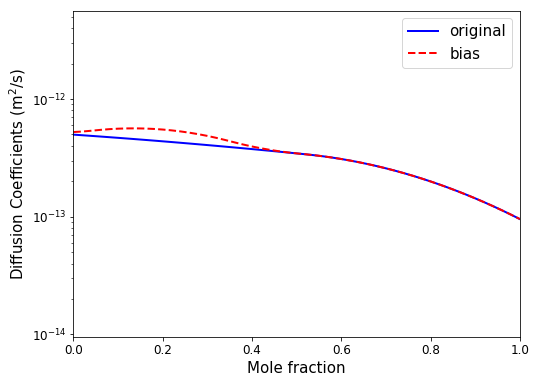

In [2]:
profile_fsa, diffsys_TiZr = read_csv('TiZr.csv', [0, 1])
profile_exp, _ = read_csv('TiZr_exp.csv')
diffsys_bias = DCbias(diffsys_TiZr, 0.2, 0.1)

ax = plt.figure(figsize=(8, 6)).add_subplot(111)
DCplot(diffsys_TiZr, ax, label='original')
DCplot(diffsys_bias, ax, c='r', ls='--', label='bias')
plt.legend(fontsize=15)
plt.show()

### Error Analysis of Ti-Zr 1000C Diffusion Data

Here is an example showing error analysis of Ti-Zr 1000C data, calculating 3 positions at (0, 0.5, 1.0). Low accuracy this time.

In [3]:
dism = mesh(profile_fsa, diffsys_TiZr, n=[300, 350])
mp = matanocalc(profile_fsa, [0, 1])
profile_init = step(dism, mp, diffsys_TiZr)
time = 100*3600
error_result = ErrorAnalysis(profile_exp, profile_init, diffsys_TiZr, time, loc=3, accuracy=1e-2)

Meshing Num=337, Minimum grid=5.653367 um
Simulation Complete
Reference error=  0.000994. Input cap error: [ 0.001004]0.002
Cap error =  0.002000
At 0.000, simulation #1, deltaD = 0.500000, profile difference = 0.024877(0.002000)
At 0.000, simulation #2, deltaD = 0.021064, profile difference = 0.001360(0.002000)
At 0.000, simulation #3, deltaD = 0.034099, profile difference = 0.001736(0.002000)
At 0.000, simulation #4, deltaD = 0.039415, profile difference = 0.001909(0.002000)
At 0.000, simulation #5, deltaD = 0.041238, profile difference = 0.001973(0.002000)
At 0.000, simulation #6, deltaD = 0.041784, profile difference = 0.001992(0.002000)
Error (positive) at 0.000 = 0.041784, 6 simulations performed, profile difference = 0.001992
At 0.000, simulation #1, deltaD = -0.041784, profile difference = 0.001680(0.002000)
At 0.000, simulation #2, deltaD = -0.083568, profile difference = 0.003039(0.002000)
At 0.000, simulation #3, deltaD = -0.051624, profile difference = 0.001984(0.002000)
Er

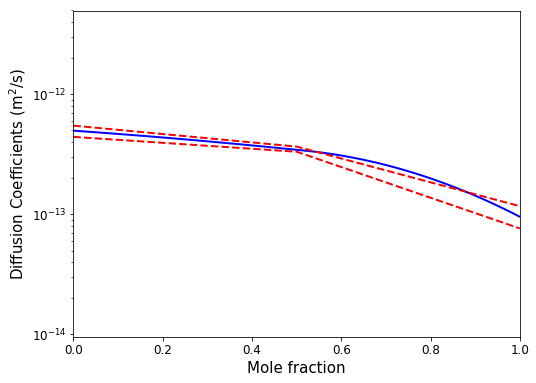

In [4]:
ax = plt.figure(figsize=(8, 6)).add_subplot(111)
DCplot(diffsys_TiZr, ax, error_result)

The error bar is marked out around the original diffusion coefficients data. Next example we try more calculation points and high accuracy.

Simulation Complete
Reference error=  0.000994. Input cap error: [ 0.001004].002
Cap error =  0.002000
Error (positive) at 0.000 = 0.041997, 8 simulations performed, profile difference = 0.001999
Error (negative) at 0.000 = -0.052094, 4 simulations performed, profile difference = 0.001999
Error (positive) at 0.050 = 0.032288, 4 simulations performed, profile difference = 0.001999
Error (negative) at 0.050 = -0.038047, 4 simulations performed, profile difference = 0.001999
Error (positive) at 0.100 = 0.027479, 4 simulations performed, profile difference = 0.001999
Error (negative) at 0.100 = -0.030265, 4 simulations performed, profile difference = 0.002000
Error (positive) at 0.150 = 0.024283, 3 simulations performed, profile difference = 0.001999
Error (negative) at 0.150 = -0.025840, 4 simulations performed, profile difference = 0.002000
Error (positive) at 0.200 = 0.022604, 3 simulations performed, profile difference = 0.001999
Error (negative) at 0.200 = -0.022679, 3 simulations per

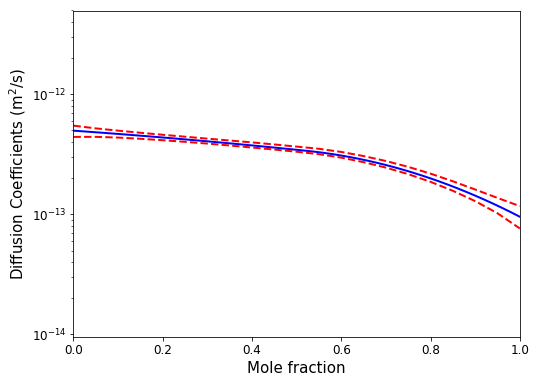

In [5]:
error_result2 = ErrorAnalysis(profile_exp, profile_init, diffsys_TiZr, time, loc=21, accuracy=1e-3, output=False)
ax = plt.figure(figsize=(8, 6)).add_subplot(111)
DCplot(diffsys_TiZr, ax, error_result2)